In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
TRAIN_DIR = '/content/drive/MyDrive/CVPR/test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['cat', 'bird', 'deer', 'airplane', 'horse', 'dog', 'truck', 'frog', 'ship', 'automobile']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    print(f"Category: {c}")
    CLASS_NUM = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        TRAIN_DATA.append([img_arr, CLASS_NUM])
#print(len(TRAIN_DATA))
print("\n")

Category: cat


100%|██████████| 1000/1000 [00:34<00:00, 28.76it/s]


Category: bird


100%|██████████| 1000/1000 [00:14<00:00, 68.77it/s]


Category: deer


100%|██████████| 1000/1000 [00:13<00:00, 72.10it/s]


Category: airplane


100%|██████████| 1000/1000 [00:15<00:00, 66.13it/s]


Category: horse


100%|██████████| 1000/1000 [00:14<00:00, 68.32it/s]


Category: dog


100%|██████████| 1000/1000 [00:15<00:00, 65.59it/s]


Category: truck


100%|██████████| 1000/1000 [00:17<00:00, 56.07it/s]


Category: frog


100%|██████████| 1000/1000 [00:13<00:00, 73.05it/s]


Category: ship


100%|██████████| 1000/1000 [00:14<00:00, 68.56it/s]


Category: automobile


100%|██████████| 1000/1000 [00:14<00:00, 68.43it/s]

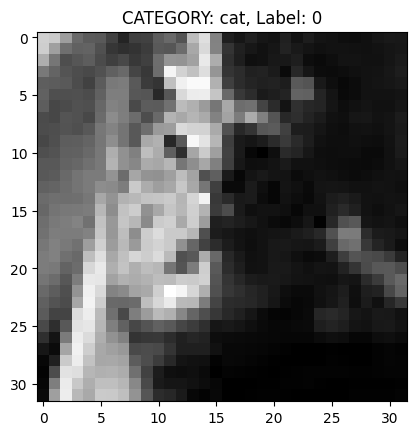

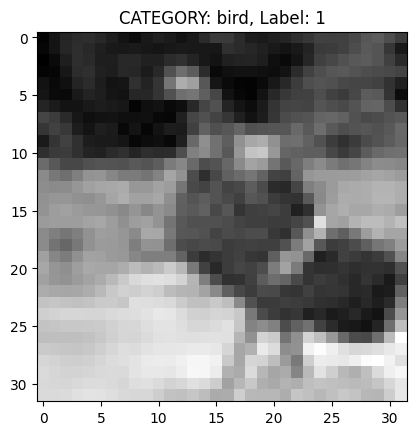

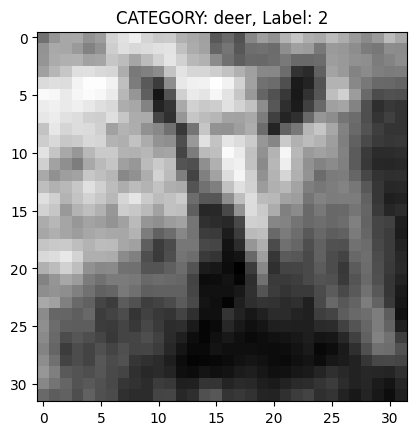

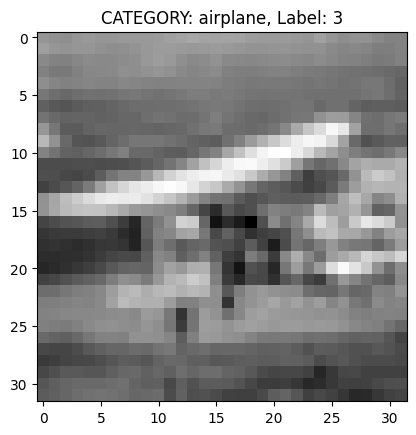

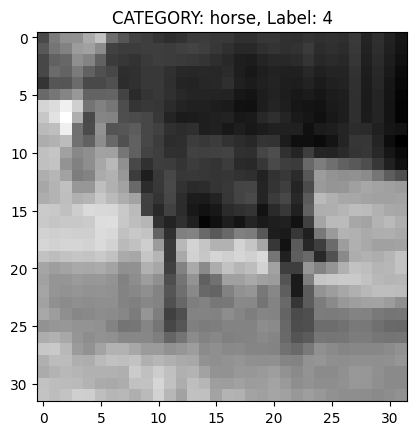

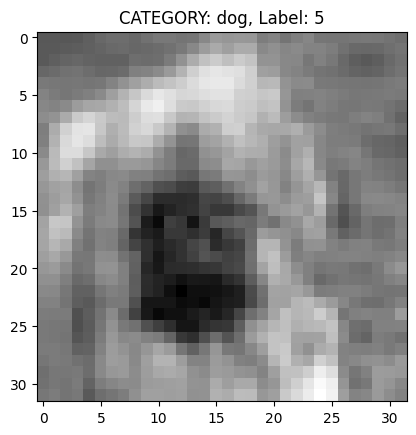

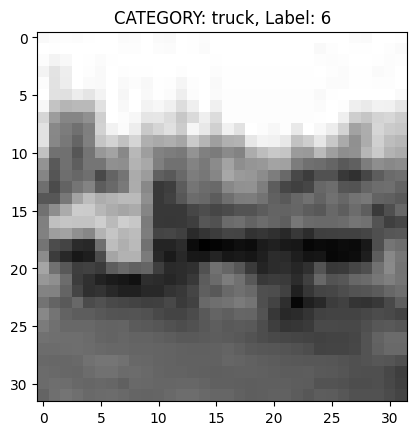

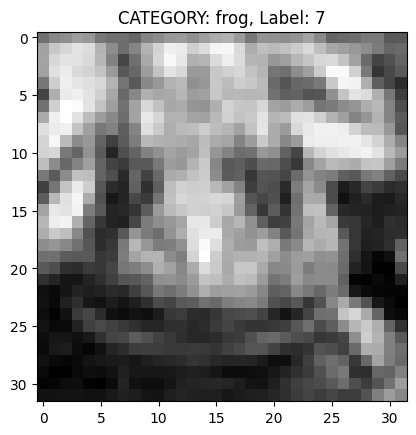

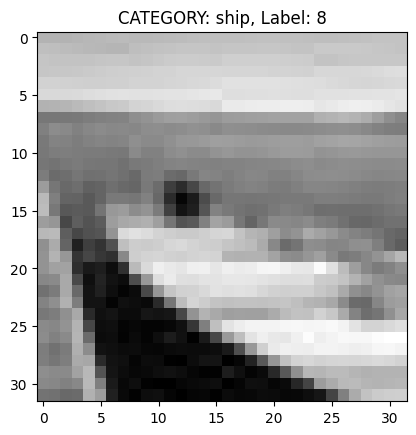

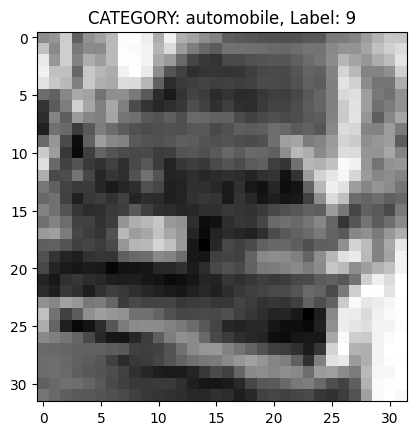

In [4]:
for c in CATEGORIES:
    images_in_CATEGORIES = [item for item in TRAIN_DATA if item[1] == CATEGORIES.index(c)]
    if images_in_CATEGORIES:
        FIRST_IMAGE, label = images_in_CATEGORIES[0]
        plt.imshow(FIRST_IMAGE, cmap='gray')
        plt.title(f"CATEGORY: {c}, Label: {label}")
        plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]  # Adjust the range of K values if needed
accuracy_manhattan_list = []
accuracy_euclidean_list = []
X = np.array([item[0].flatten() for item in TRAIN_DATA])
y = np.array([item[1] for item in TRAIN_DATA])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in tqdm(kf.split(X), total=5):
    X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
    y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]

    accuracy_manhattan_fold = []
    accuracy_euclidean_fold = []

    for k in k_values:
        knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        knn_manhattan.fit(X_train, y_train)
        knn_euclidean.fit(X_train, y_train)

        y_pred_manhattan = knn_manhattan.predict(X_test)
        y_pred_euclidean = knn_euclidean.predict(X_test)

        accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
        accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

        accuracy_manhattan_fold.append(accuracy_manhattan)
        accuracy_euclidean_fold.append(accuracy_euclidean)

    accuracy_manhattan_list.append(accuracy_manhattan_fold)
    accuracy_euclidean_list.append(accuracy_euclidean_fold)

100%|██████████| 5/5 [08:21<00:00, 100.31s/it]


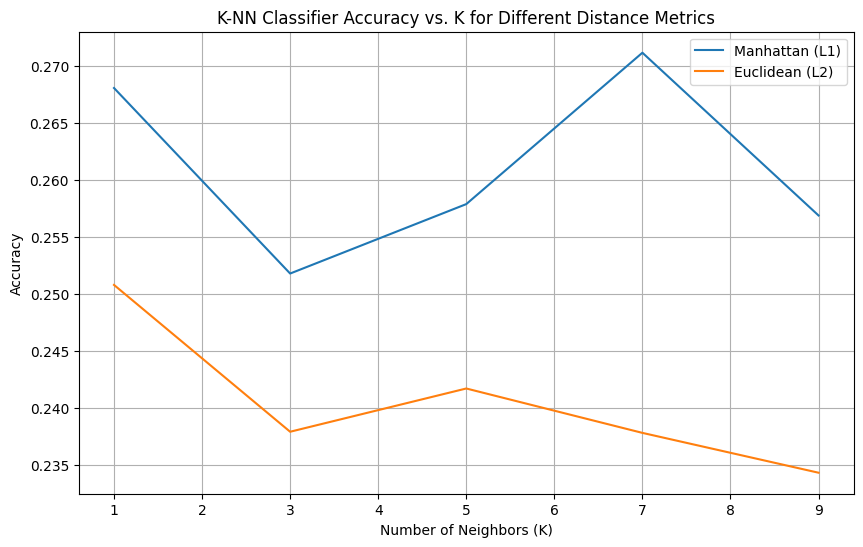

In [15]:
avg_accuracy_manhattan = [sum(fold) / 5 for fold in accuracy_manhattan_list]
avg_accuracy_euclidean = [sum(fold) / 5 for fold in accuracy_euclidean_list]

plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_manhattan, label='Manhattan (L1)')
plt.plot(k_values, avg_accuracy_euclidean, label='Euclidean (L2)')
plt.title('K-NN Classifier Accuracy vs. K for Different Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


**TOP FIVE PREDICTION:**

In [16]:
TEST_TRAIN_DIR = '/content/drive/MyDrive/CVPR/test'
TEST_DATA = []
TEST_CATEGORIES = os.listdir(TEST_TRAIN_DIR)
for c in TEST_CATEGORIES:
    path = os.path.join(TEST_TRAIN_DIR, c)
    print(f"Category: {c}")

    IMAGE_PATHS = os.listdir(path)

    for img in tqdm(IMAGE_PATHS):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        TEST_DATA.append((img_arr, TEST_CATEGORIES.index(c)))

Category: cat


100%|██████████| 1000/1000 [00:02<00:00, 375.26it/s]


Category: bird


100%|██████████| 1000/1000 [00:02<00:00, 350.24it/s]


Category: deer


100%|██████████| 1000/1000 [00:02<00:00, 413.46it/s]


Category: airplane


100%|██████████| 1000/1000 [00:02<00:00, 394.62it/s]


Category: horse


100%|██████████| 1000/1000 [00:02<00:00, 397.82it/s]


Category: dog


100%|██████████| 1000/1000 [00:02<00:00, 385.57it/s]


Category: truck


100%|██████████| 1000/1000 [00:03<00:00, 326.60it/s]


Category: frog


100%|██████████| 1000/1000 [00:02<00:00, 367.01it/s]


Category: ship


100%|██████████| 1000/1000 [00:02<00:00, 395.77it/s]


Category: automobile


100%|██████████| 1000/1000 [00:02<00:00, 344.45it/s]


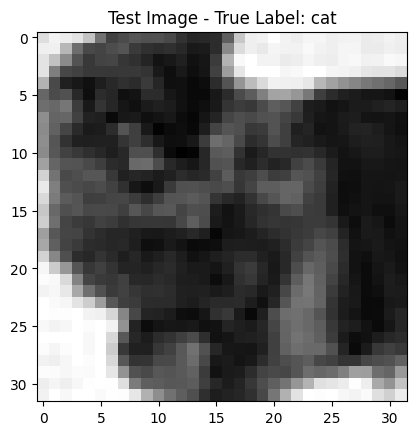

Top 5 Predictions for Manhattan Distance:
Prediction 1: cat (Correct)
Prediction 2: dog (Incorrect)
Prediction 3: cat (Correct)
Prediction 4: cat (Correct)
Prediction 5: cat (Correct)


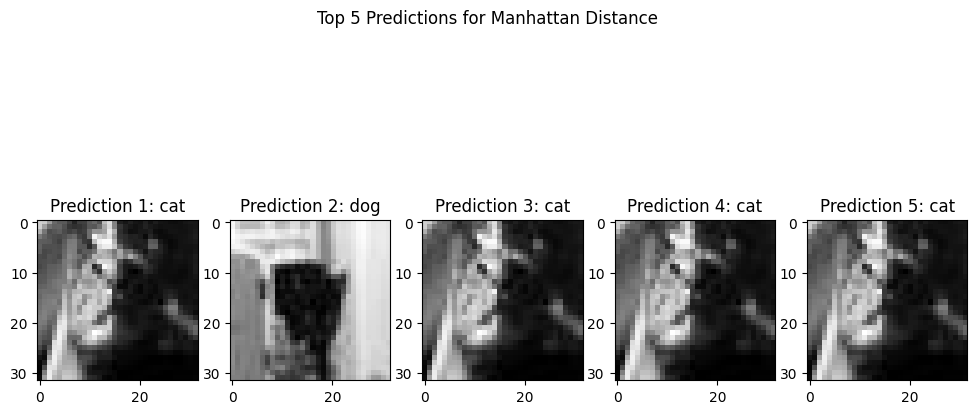

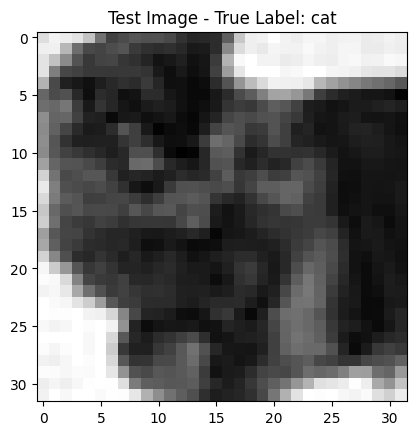

Top 5 Predictions for Euclidean Distance:
Prediction 1: cat (Correct)
Prediction 2: dog (Incorrect)
Prediction 3: cat (Correct)
Prediction 4: cat (Correct)
Prediction 5: frog (Incorrect)


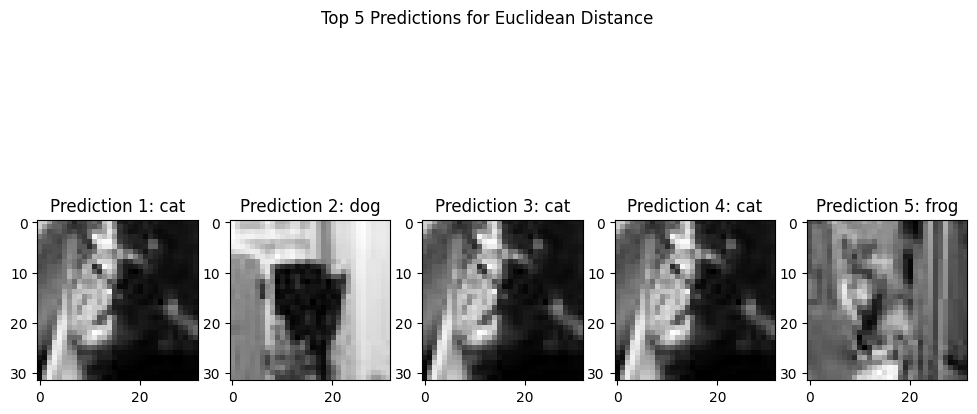

In [21]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the best K values
best_k_manhattan = 9
best_k_euclidean = 9

# Initialize KNN classifiers
knn_manhattan = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
knn_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')

knn_manhattan.fit(X, y)
knn_euclidean.fit(X, y)

y_pred_manhattan = []
y_pred_euclidean = []


for i in range(200):
    y_pred_manhattan.append(knn_manhattan.predict([X_test[i]]))
    y_pred_euclidean.append(knn_euclidean.predict([X_test[i]]))

# Define a function to display top predictions
def display_top_predictions(image_index, classifier, distance_type):
    image = X_test[image_index].reshape(32, 32)
    plt.imshow(image, cmap='gray')
    plt.title(f"Test Image - True Label: {TEST_CATEGORIES[y_test[image_index]]}")
    plt.show()


    distances, indices = classifier.kneighbors([X_test[image_index]], n_neighbors=5)
    top_predictions = y[indices[0]]

    print(f"Top 5 Predictions for {distance_type} Distance:")
    for i, label in enumerate(top_predictions):
        prediction = CATEGORIES[label]
        is_correct = "Correct" if label == y_test[image_index] else "Incorrect"
        print(f"Prediction {i + 1}: {prediction} ({is_correct})")


    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Top 5 Predictions for {distance_type} Distance")
    for i, label in enumerate(top_predictions):
        img = X[label].reshape(32, 32)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction {i + 1}: {CATEGORIES[label]}")

    plt.show()

# Call
display_top_predictions(0, knn_manhattan, "Manhattan")

# Call
display_top_predictions(0, knn_euclidean, "Euclidean")


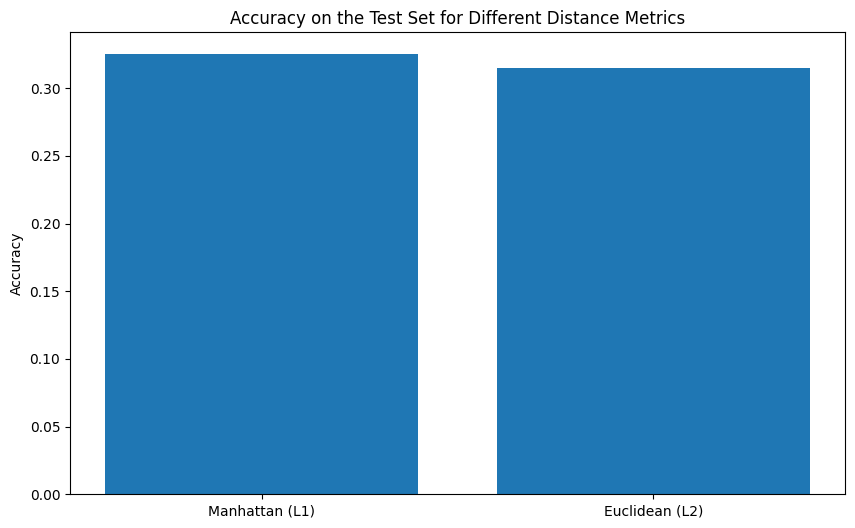

In [22]:
correct_manhattan = sum(1 for i in range(200) if knn_manhattan.predict([X_test[i]])[0] == y_test[i])
correct_euclidean = sum(1 for i in range(200) if knn_euclidean.predict([X_test[i]])[0] == y_test[i])


accuracy_manhattan = correct_manhattan / 200
accuracy_euclidean = correct_euclidean / 200

plt.figure(figsize=(10, 6))
plt.bar(['Manhattan (L1)', 'Euclidean (L2)'], [accuracy_manhattan, accuracy_euclidean])
plt.title('Accuracy on the Test Set for Different Distance Metrics')
plt.ylabel('Accuracy')
plt.show()